<a href="https://colab.research.google.com/github/Isaldong/BDDM/blob/main/Faisal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/penyakit_ginjal_kronik.csv'
data = pd.read_csv(file_path)
data.head(5)

,id,umur,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data = data.drop(columns=["id"])

In [ ]:
numeric_cols = data.select_dtypes(include=["float64"]).columns
categorical_cols = data.select_dtypes(include=["object"]).columns

In [ ]:
numeric_imputer = SimpleImputer(strategy="median")
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

In [ ]:
categorical_imputer = SimpleImputer(strategy="most_frequent")
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

<ipython-input-9-10b2cf0bc636>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["klasifikasi"], palette="viridis")


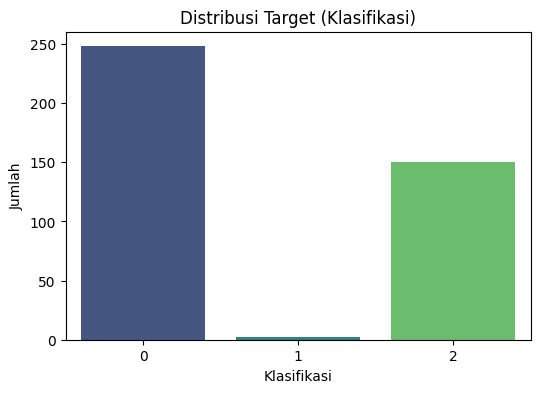

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["klasifikasi"], palette="viridis")
plt.title("Distribusi Target (Klasifikasi)")
plt.xlabel("Klasifikasi")
plt.ylabel("Jumlah")
plt.show()

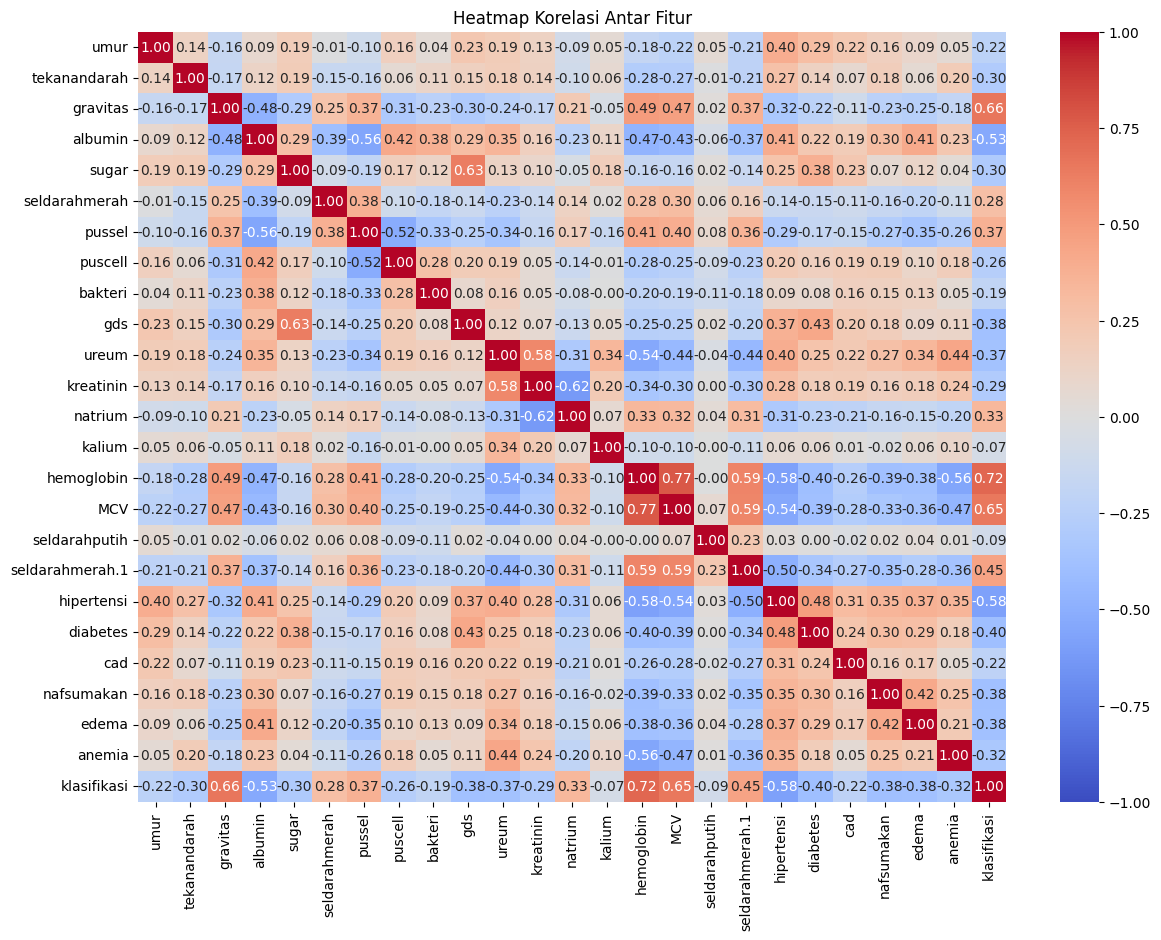

In [ ]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [ ]:
X = data.drop(columns=["klasifikasi"])
y = data["klasifikasi"]

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Fitur yang dipilih:", selected_features)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)

Fitur yang dipilih: Index(['gravitas', 'albumin', 'gds', 'hemoglobin', 'MCV', 'seldarahmerah.1',
       'hipertensi', 'diabetes', 'nafsumakan', 'edema'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Skor Akurasi Cross-Validation: [0.975  0.9375 0.8875 0.95   0.8875]
Skor Akurasi Rata-rata: 0.9275
Standar Deviasi Skor: 0.03482097069296031
Confusion Matrix:
[[45  5]
 [ 0 30]]


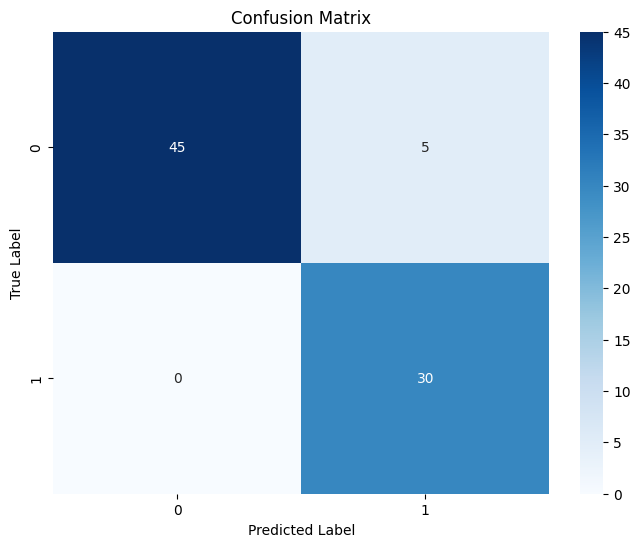


Accuracy: 0.9375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        50
           2       0.86      1.00      0.92        30

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

num_folds = 5
scores = cross_val_score(knn, X_new, y, cv=num_folds, scoring='accuracy')
print("Skor Akurasi Cross-Validation:", scores)
print("Skor Akurasi Rata-rata:", scores.mean())
print("Standar Deviasi Skor:", scores.std())

y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(class_report)